## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [ ]:
#Mengampilkan 5 baris pertama
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [ ]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

## `Jawaban No 1`

In [ ]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
top5_produk =df[
    (df['category'] == 'Mobiles & Tablets') &
    (df['order_date'].dt.year == 2022) &
    (df['is_valid'] == 1)]

additional_code = (
    top5_produk.groupby('sku_name')['qty_ordered'].sum().sort_values(ascending=False).reset_index(name='penjualan_2022')
)

additional_code.head()
additional_code


,sku_name,penjualan_2022
0,IDROID_BALRX7-Gold,1000
1,IDROID_BALRX7-Jet black,31
2,Infinix Hot 4-Gold,15
3,samsung_Grand Prime Plus-Black,11
4,infinix_Zero 4-Grey,10
5,samsung_Grand Prime Plus-Silver,10
6,iphone_7-128GB-wof-Matt Black,6
7,Samsung-Galaxy-S8-G955-Plus-Black,5
8,iphone_7-128GB-wof-Jet Black,5
9,samsungGALAXY J510F-2016 DS LTE-Gold,4


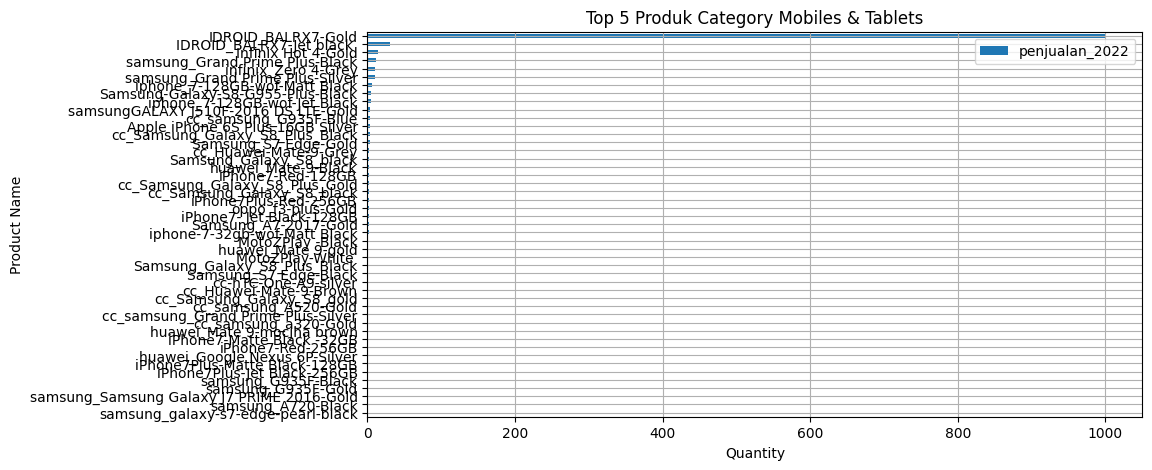

In [ ]:
# Mengurutkan data berdasarkan qty_ordered
additional_code.sort_values(by='penjualan_2022', ascending=True, inplace=True)

# Grafik
additional_code.plot(x = 'sku_name',
                     y = ['penjualan_2022'],
                     kind = 'barh',
                     figsize=(10, 5),
                     title = 'Top 5 Produk Category Mobiles & Tablets',
                     xlabel = 'Quantity',
                     ylabel = 'Product Name',
                     grid = True)
plt.show(5)


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

## `Jawaban No 2.1`

In [ ]:
qty2022 = df[
    (df['is_valid'] == 1) & (df['order_date'].dt.year == 2022)]\
    .groupby('category')['qty_ordered'].sum()\
    .reset_index(name='qty_2022')

qty2021 = df[
    (df['is_valid'] == 1) & (df['order_date'].dt.year == 2021)]\
    .groupby('category')['qty_ordered'].sum()\
    .reset_index(name='qty_2021')

qty15 = qty2021.merge(qty2022, on='category', how='outer')
qty15.fillna(0, inplace=True)
qty15['qty_difference'] = qty15['qty_2022'] - qty15['qty_2021']
qty15.sort_values(by='qty_2021', ascending=False, inplace=True)

qty15['percentage_change'] = round(((qty15['qty_2022'] - qty15['qty_2021']) / qty15['qty_2021']) * 100, 2)
qty15['information'] = np.where(qty15['qty_2022'] > qty15['qty_2021'], '+' + qty15['percentage_change'].astype(str) + '%',
                                np.where(qty15['qty_2022'] < qty15['qty_2021'], qty15['percentage_change'].astype(str) + '%', '0.0%'))
qty15 = qty15.head(15)

qty15

,category,qty_2021,qty_2022,qty_difference,percentage_change,information
12,Soghaat,759,612,-147,-19.37,-19.37%
10,Others,426,263,-163,-38.26,-38.26%
13,Superstore,327,536,209,63.91,+63.91%
8,Men Fashion,237,175,-62,-26.16,-26.16%
6,Home & Living,193,250,57,29.53,+29.53%
11,School & Education,184,237,53,28.80,+28.8%
5,Health & Sports,173,200,27,15.61,+15.61%
2,Books,171,195,24,14.04,+14.04%
7,Kids & Baby,170,227,57,33.53,+33.53%
1,Beauty & Grooming,168,153,-15,-8.93,-8.93%


## `Jawaban No 2.2`

In [ ]:
# Data kuantitas penjualan 2022 berdasarkan sku_name
sku2022 = df[
    (df['is_valid'] == 1) & (df['category'] == 'others') & (df['order_date'].dt.year == 2022)]\
    .groupby('sku_name')['qty_ordered'].sum()\
    .reset_index(name='qty_2022')

# Data kuantitas penjualan 2021 berdasarkan sku_name
sku2021 = df[
    (df['is_valid'] == 1) & (df['category'] == 'others') & (df['order_date'].dt.year == 2021)]\
    .groupby('sku_name')['qty_ordered'].sum()\
    .reset_index(name='qty_2021')

# Menggabungkan data dari sku2021 dengan sku2022
sku20 = sku2021.merge(sku2022, on= 'sku_name', how='outer')
sku20.fillna(0, inplace =True)

# Menghitung percentase selisih kuantitas penjualan
sku20['percentage_change'] = round(((sku20['qty_2022'] - sku20['qty_2021']) / sku20['qty_2021']) * 100, 2)
sku20['information'] = np.where(sku20['qty_2022'] > sku20['qty_2021'], '' + sku20['percentage_change'].astype(str) + '%',
    np.where(sku20['qty_2022'] < sku20['qty_2021'], sku20['percentage_change'].astype(str) + '%', '0.0%'))

sku20 = sku20.head(20)
sku20


,sku_name,qty_2021,qty_2022,percentage_change,information


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

## `Jawaban No 3`

In [ ]:
dt_cust = df [
    (df['is_gross'] == 1) &
    (df['is_valid'] ==0) &
    (df['is_net'] == 0) &
    ((df['order_date'] >= '2022-01-01') & (df['order_date'] <= '2022-12-31'))
]
dt_cust = dt_cust[['customer_id', 'registered_date']]
dt_cust = dt_cust.drop_duplicates(subset='customer_id')
dt_cust


,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5855,C653797L,2022-04-03
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13


## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

## `Jawaban No 4.1`

1. Preparation data hingga data layak dan sesuai

In [ ]:
# Mengubah tipe data order_date menjadi datetime
df_od['order_date'] = pd.to_datetime(df_od['order_date'])

# Membuat kolom day, month, dan month_number
df_od['day'] = df_od['order_date'].dt.day_name()
df_od['month'] = df_od['order_date'].dt.month_name()
df_od['month_number'] = df_od['order_date'].dt.month

# Memfilter data is valid = 1, selama 2022 bulan oktober sampai desember
df_valid = df_od[(df_od['is_valid'] == 1) &
                 (df_od['order_date'].dt.year == 2022) &
                 (df_od['month_number'].isin([10, 11, 12]))]

2. Eksekusi menghitung rata-rata harian penjualan before_discount berdasarkan weekends (sabtu dan minggu) vs rata-rata harian penjualan weekdays (senin-jumat) bulan oktober - desember 2022


In [ ]:
# Menghitung total sales
df_valid.loc[:,'total_sales'] = df_valid['before_discount']

# Memisahkan data yang termasuk weekends dan weekdays
weekends = df_valid[df_valid['day'].isin(['Saturday', 'Sunday'])]
weekdays = df_valid[df_valid['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Mengelompokkan data berdasarkan bulan dan menghitung rata-rata penjualan harian weekdays dan weekends per bulan
# Weekends
avg_sales_weekends = weekends.groupby(['month_number', 'month'])['total_sales'].mean().reset_index()
avg_sales_weekends.rename(columns={'total_sales': 'avg_sales_weekends'}, inplace=True)
avg_sales_weekends['day_type'] = 'Weekend'
# Weekdays
avg_sales_weekdays = weekdays.groupby(['month_number', 'month'])['total_sales'].mean().reset_index()
avg_sales_weekdays.rename(columns={'total_sales': 'avg_sales_weekdays'}, inplace=True)
avg_sales_weekdays['day_type'] = 'Weekday'

# Menggabungkan data rata - rata penjualan weekdays dan weekends
avg_sales_per_month = pd.merge(avg_sales_weekends, avg_sales_weekdays, on=['month_number', 'month'], how='outer')
avg_sales_per_month.fillna(0, inplace=True)

# Menghitung selisih rata - rata penjualan
avg_sales_per_month['sales_difference'] = avg_sales_per_month['avg_sales_weekdays'] - avg_sales_per_month['avg_sales_weekends']
# Menghitung persentasi selisih
avg_sales_per_month['percentage_difference'] = np.where(avg_sales_per_month['avg_sales_weekends'] != 0,
    np.round((avg_sales_per_month['sales_difference'] / avg_sales_per_month['avg_sales_weekends']) * 100, 2), 0)
avg_sales_per_month['percentage_difference'] = avg_sales_per_month['percentage_difference'].astype(str) + '%'

# Menampilkan hasil data rata - rata  penjualan per bulan
avg_sales_per_month = avg_sales_per_month[['month_number', 'month', 'avg_sales_weekends', 'avg_sales_weekdays', 'sales_difference', 'percentage_difference']]
avg_sales_per_month

<ipython-input-15-a404bbc4fb04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid.loc[:,'total_sales'] = df_valid['before_discount']


,month_number,month,avg_sales_weekends,avg_sales_weekdays,sales_difference,percentage_difference
0,10,October,634260.074074,874690.266667,240430.192593,37.91%
1,11,November,607794.210526,641862.000000,34067.789474,5.61%
2,12,December,410599.400000,813574.285714,402974.885714,98.14%


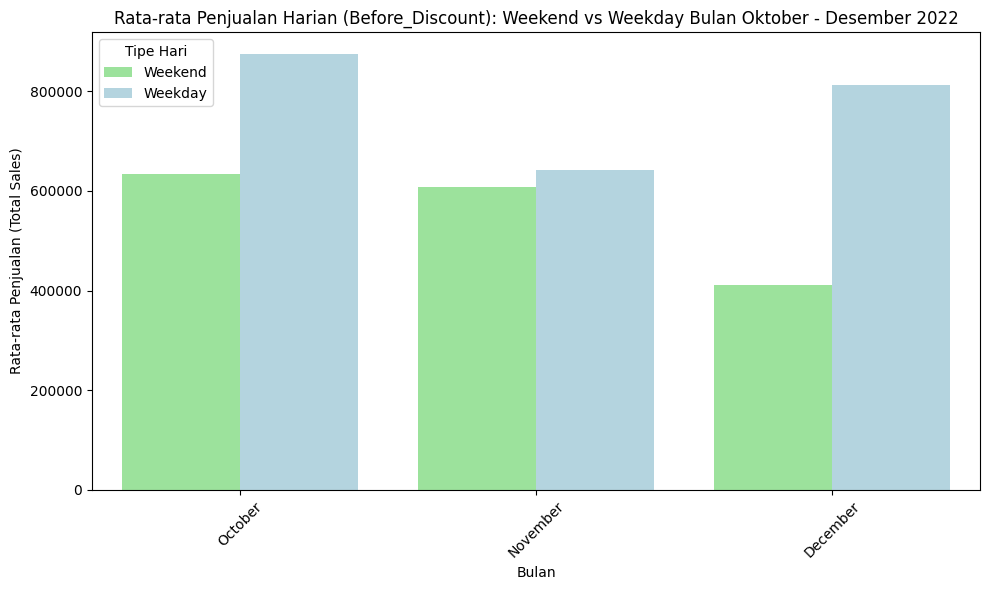

In [ ]:
#Visualisasi hasil rata - rata penjualan
melted_data = pd.melt(avg_sales_per_month, id_vars=['month_number', 'month'], value_vars=['avg_sales_weekends', 'avg_sales_weekdays'],
                      var_name='day_type', value_name='total_sales')
melted_data['day_type'] = melted_data['day_type'].replace({'avg_sales_weekends': 'Weekend', 'avg_sales_weekdays': 'Weekday'})

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_data, x='month', y='total_sales', hue='day_type',
            palette={'Weekend': 'lightgreen', 'Weekday': 'lightblue'})

plt.title('Rata-rata Penjualan Harian (Before_Discount): Weekend vs Weekday Bulan Oktober - Desember 2022')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penjualan (Total Sales)')
plt.xticks(rotation=45)
plt.legend(title='Tipe Hari')
plt.tight_layout()

plt.show()

## `Jawaban No 4.2`

In [ ]:
# Menghitung rata-rata penjualan untuk 3 bulan
data_sales_22 = {
    'Periode': '3 months',
    'Avg_Weekends_Sales': round(avg_sales_per_month['avg_sales_weekends'].mean(), 2),
    'Avg_Weekdays_Sales': round(avg_sales_per_month['avg_sales_weekdays'].mean(), 2),
    'Difference_Sales': round(avg_sales_per_month['sales_difference'].mean(), 2),
    'Difference_Percentage': pd.Series(round((avg_sales_per_month['sales_difference'].mean() / avg_sales_per_month['avg_sales_weekends'].mean()) * 100, 2),  dtype=str) + '%'}

overall_sales_avg = pd.DataFrame(data=data_sales_22, index=[0])
overall_sales_avg


,Periode,Avg_Weekends_Sales,Avg_Weekdays_Sales,Difference_Sales,Difference_Percentage
0,3 months,550884.56,776708.85,225824.29,40.99%
